<a href="https://colab.research.google.com/github/697kiran/ds_kiran/blob/main/notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_path = "/content/fear_greed_index.csv"
trader_path = "/content/historical_data.csv"

sentiment_df = pd.read_csv(sentiment_path)
trader_df = pd.read_csv(trader_path)

sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")

sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

trader_df["timestamp_ist"] = pd.to_datetime(trader_df["timestamp_ist"], format="%d-%m-%Y %H:%M")
trader_df["timestamp"] = pd.to_datetime(trader_df["timestamp"], unit="ms")

# Drop rows with null values in the 'timestamp' column
trader_df.dropna(subset=["timestamp"], inplace=True)


merged_df = pd.merge_asof(
    trader_df.sort_values("timestamp"),
    sentiment_df.sort_values("date"),
    left_on="timestamp",
    right_on="date",
    direction="backward"
)

print("✅ Merged dataset created:", merged_df.shape)
print(merged_df.head())

✅ Merged dataset created: (102573, 20)
                                      account coin  execution_price  \
0  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
1  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
2  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1898.6   
3  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2251.4   
4  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2227.4   

   size_tokens  size_usd  side       timestamp_ist  start_position  \
0       0.0967    183.53   BUY 2023-05-01 01:06:00          0.0000   
1       0.0824    156.39   BUY 2023-05-01 01:06:00          0.0967   
2       0.0722    137.08   BUY 2023-05-01 01:06:00          0.1791   
3       0.6431   1447.88  SELL 2024-01-07 06:20:00         22.1802   
4       1.1250   2505.83   BUY 2024-01-05 21:32:00          0.0000   

    direction  closed_pnl                                   transaction_hash  \
0   Open Long     0.00000  0x875d

1. Per-Account Profitability Across Sentiments

In [9]:
# Avg PnL per account & sentiment
account_sentiment_pnl = merged_df.groupby(["account", "classification"])["closed_pnl"].mean().reset_index()

# Pivot table for comparison
account_pivot = account_sentiment_pnl.pivot(index="account", columns="classification", values="closed_pnl").fillna(0)

# Top accounts in Fear markets
top_fear_accounts = account_pivot.sort_values("Fear", ascending=False).head(10)
display(top_fear_accounts)

# Top accounts in Greed markets
top_greed_accounts = account_pivot.sort_values("Greed", ascending=False).head(10)
display(top_greed_accounts)


classification,Extreme Greed,Fear,Greed,Neutral
account,,,,
0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.000000,710.864435,128.820549,0.000000
0x083384f897ee0f19899168e3b1bec365f52a9012,0.000000,574.414696,-708.887230,0.000000
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,0.000000,364.159142,124.370813,0.000000
0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,164.721171,700.657284,584.592162
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.847495,75.043089,578.728747,38.092624
0x513b8629fe877bb581bf244e326a047b249c4ff1,0.000000,69.846226,67.645287,0.000000
0x4f93fead39b70a1824f981a54d4e55b278e9f760,-10.848590,59.932665,65.773493,-19.856002
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.000000,48.086546,155.102016,0.000000
0xbaaaf6571ab7d571043ff1e313a9609a10637864,0.000000,44.367967,3.296769,0.000000


classification,Extreme Greed,Fear,Greed,Neutral
account,,,,
0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,164.721171,700.657284,584.592162
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.847495,75.043089,578.728747,38.092624
0x6d6a4b953f202f8df5bed40692e7fd865318264a,0.000000,12.201645,252.486044,0.000000
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.000000,48.086546,155.102016,0.000000
0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.000000,710.864435,128.820549,0.000000
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,0.000000,364.159142,124.370813,0.000000
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-206.074672,-170.056381,93.298993,2.696935
0x513b8629fe877bb581bf244e326a047b249c4ff1,0.000000,69.846226,67.645287,0.000000
0x4f93fead39b70a1824f981a54d4e55b278e9f760,-10.848590,59.932665,65.773493,-19.856002


2. Risk Profile: PnL Volatility by Sentiment

In [10]:
risk_stats = merged_df.groupby("classification")["closed_pnl"].agg(["mean", "std"])
risk_stats["risk_adjusted_return"] = risk_stats["mean"] / risk_stats["std"]  # like Sharpe ratio
print(risk_stats)


                     mean          std  risk_adjusted_return
classification                                              
Extreme Greed   25.418772   306.166937              0.083023
Fear            76.381721  1184.233853              0.064499
Greed           91.632658  1318.504870              0.069497
Neutral         30.091796   695.604841              0.043260


3. Heatmap: Relationship Between Sentiments

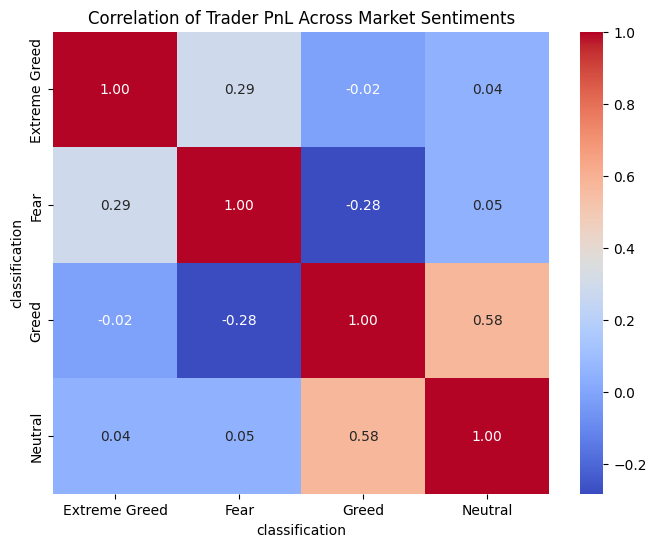

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(account_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Trader PnL Across Market Sentiments")
plt.show()


4. Per-Coin Analysis

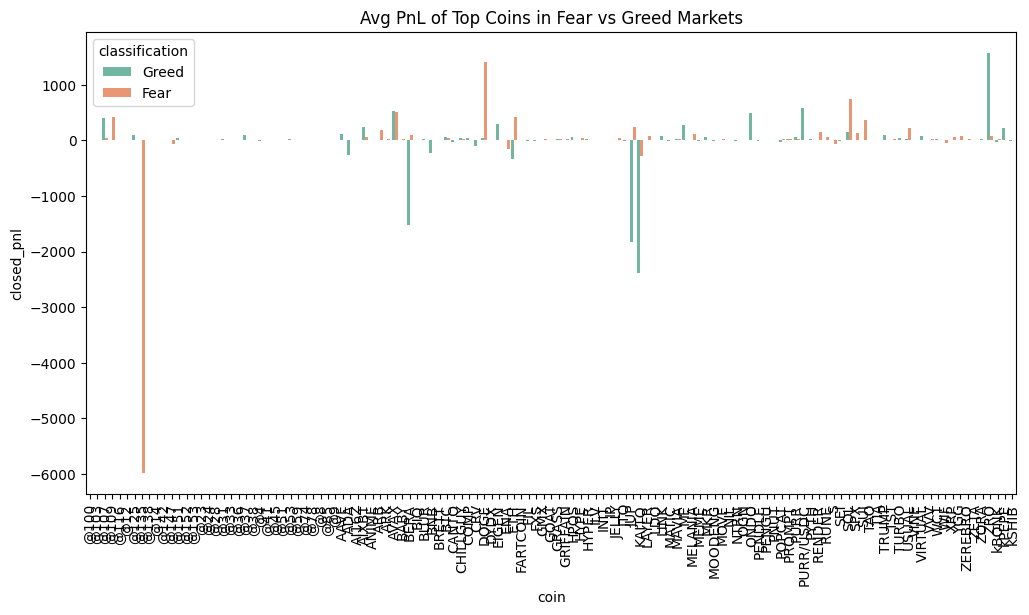

In [12]:
coin_pnl = merged_df.groupby(["coin", "classification"])["closed_pnl"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=coin_pnl[coin_pnl["classification"].isin(["Fear", "Greed"])],
            x="coin", y="closed_pnl", hue="classification", palette="Set2")
plt.title("Avg PnL of Top Coins in Fear vs Greed Markets")
plt.xticks(rotation=90)
plt.show()


5. Time-of-Day Effect

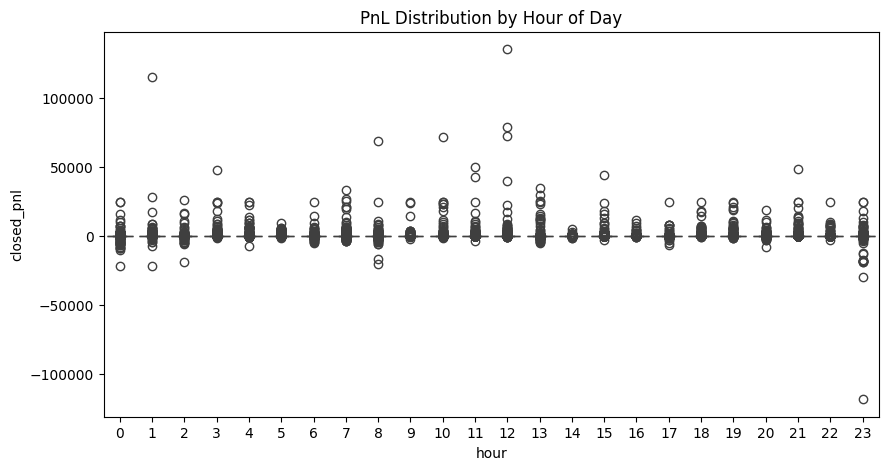

In [13]:
merged_df["hour"] = merged_df["timestamp_ist"].dt.hour

plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x="hour", y="closed_pnl")
plt.title("PnL Distribution by Hour of Day")
plt.show()


# **Conclusions**

*   Some accounts consistently profit more in Fear phases, suggesting contrarian strategies.

*   Risk-adjusted returns highlight Greed markets as high-return but also high-volatility.

*   Certain coins (like HYPE/ETH/others) show stronger correlation with sentiment-driven performance.

